In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import regex as re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix,precision_score

In [4]:
df=pd.read_csv(r"spam.csv" , encoding='utf-8',encoding_errors='replace')

## Data Cleaning

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
# Checing null values
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.duplicated().sum()
df.drop_duplicates(keep="first",inplace=True)

In [10]:
#Drop last 3 columns
df.drop(columns=['Unnamed: 2', "Unnamed: 3", 'Unnamed: 4'],inplace=True)

In [11]:
# Renaming the columns name 
df.rename({'v1':'Target','v2':'Text'},axis=1,inplace=True)

In [12]:
encoder = LabelEncoder()
df["Target"]=encoder.fit_transform(df["Target"])

In [13]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [23]:
encoder.classes_

array(['ham', 'spam'], dtype=object)

## EDA

In [24]:
df["Target"].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

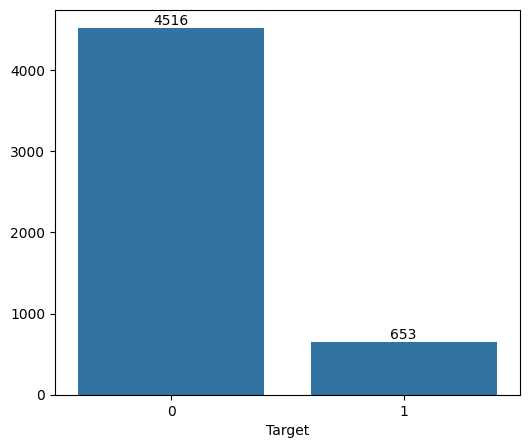

In [25]:
# Visualizing the data 
plt.figure(figsize=[6,5])
plot=sns.barplot(x=df["Target"].value_counts().index,y=df["Target"].value_counts().values)

for i in plot.containers:
    plot.bar_label(i)

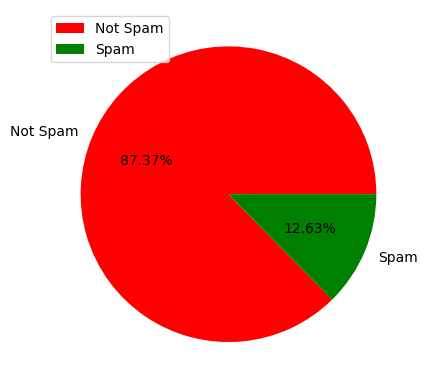

In [29]:
labels=["Not Spam","Spam"]
plt.pie(df["Target"].value_counts().values,labels=labels,autopct="%0.2f%%",colors=["Red","Green"])
plt.legend();

In [16]:
df["No_of_character"]=df["Text"].apply(len)

In [17]:
df

,Target,Text,No_of_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
df["No_of_Words"]=df["Text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [19]:
df

,Target,Text,No_of_character,No_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [20]:
df["No_of_Sentences"]=df["Text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [21]:
df

,Target,Text,No_of_character,No_of_Words,No_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


# Lets see Statistics Value of Our data

In [22]:
df[["No_of_character","No_of_Words","No_of_Sentences"]].describe()

,No_of_character,No_of_Words,No_of_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


AttributeError: 'DataFrame' object has no attribute 'No_of_character'

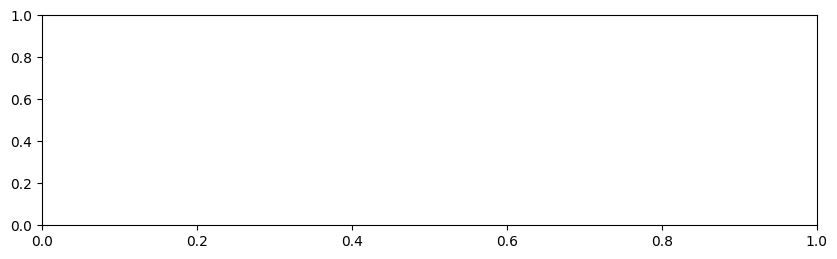

In [33]:
plt.figure(figsize=[10,6])
plt.subplot(2,1,1)
sns.histplot(df[df["Target"]==0].No_of_character,kde=True,fill=False)
sns.histplot(df[df["Target"]==1].No_of_character,kde=True,fill=False,color="Red")


plt.figure(figsize=[10,6])
plt.subplot(2,1,2)
sns.histplot(df[df["Target"]==0].No_of_Words,kde=True,fill=False)
sns.histplot(df[df["Target"]==1].No_of_Words,kde=True,fill=False,color="Red");


plt.figure(figsize=[10,6])
plt.subplot(2,1,2)
sns.histplot(df[df["Target"]==0].No_of_Sentences,kde=True,fill=False)
sns.histplot(df[df["Target"]==1].No_of_Sentences,kde=True,fill=False,color="Red");

In [34]:
sns.pairplot(df,hue="Target")

ValueError: No variables found for grid columns.

<Axes: >

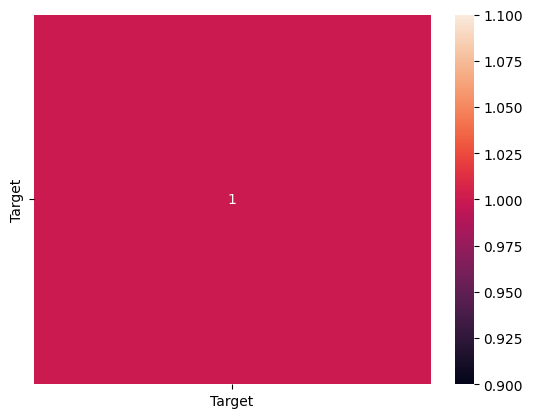

In [35]:
sns.heatmap(df.select_dtypes("int").corr(),annot=True)

### Text Preprocessing

#### Lower Case
#### Tokenization
#### Removing Special Character
#### Removing Stop Words
#### Stemming

In [36]:
def Text_preprocessing(text):
    text =  text.lower()  
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    text = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  

    stemmer = PorterStemmer()
    
    text = [stemmer.stem(word)for word in text]   
    
    return " ".join(text)
    

In [37]:
Text_preprocessing(df["Text"][418])

'alright ill head minut text meet'

In [38]:
df["Transformed_Text"]=df["Text"].apply(Text_preprocessing)

In [39]:
df

,Target,Text,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,0,Will �_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like id interest buy someth els ...


In [51]:
from wordcloud import WordCloud

### Generating Word cloud 

In [66]:
df[df["Target"]==1]["Transformed_Text"].str.lower()

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back id like fun ...
8       winner valu network custom select receivea 900...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 20000 pound txt csh11 s...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get 250 pound free call credit detai...
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
Name: Transformed_Text, Length: 653, dtype: object

In [53]:
wc = WordCloud(background_color="White")

In [69]:
spam_wc=wc.generate(df[df["Target"]==1]["Transformed_Text"].str.cat(sep=" "))

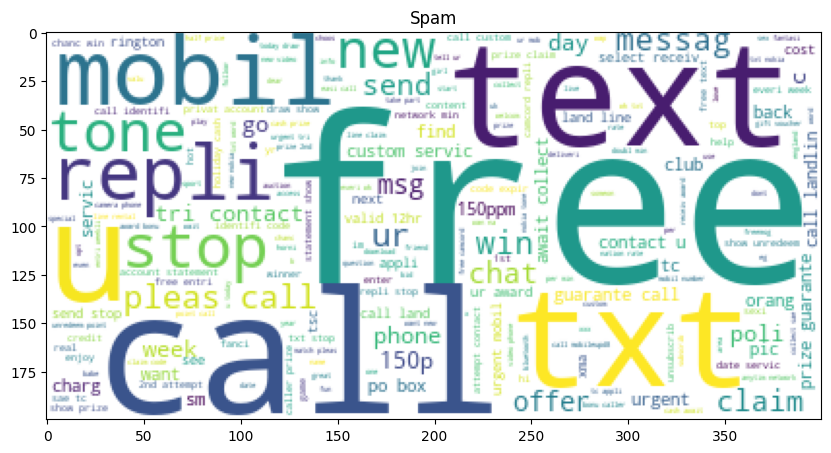

In [70]:
plt.figure(figsize=[10,8])
plt.imshow(spam_wc)
plt.title("Spam");

In [71]:
not_spam_wc=wc.generate(df[df["Target"]==0]["Transformed_Text"].str.cat(sep=" "))

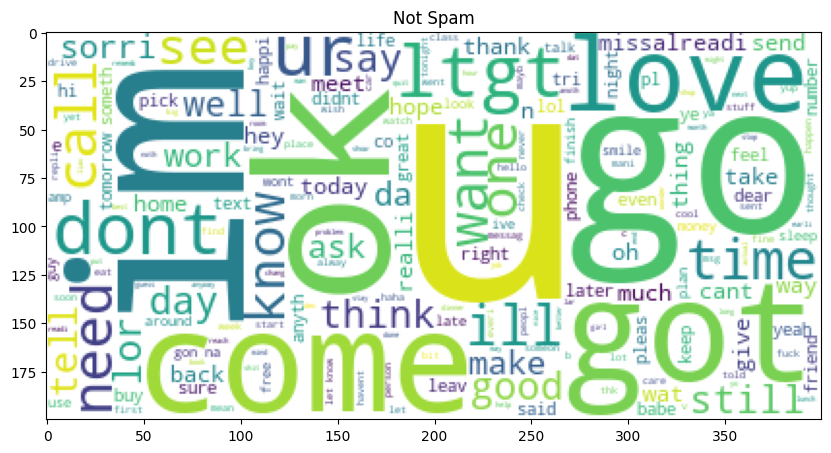

In [72]:
plt.figure(figsize=[10,8])
plt.imshow(not_spam_wc)
plt.title("Not Spam");

In [73]:
# Seeing the Count of the words 

In [74]:
def Count(target :0 or 1):
    spam_msg=[]
    for i in df[df["Target"]==target].Transformed_Text.to_list():
        for j in i.split():
            spam_msg.append(j)


    spam=pd.DataFrame(Counter(spam_msg).most_common(30),columns=["Element","Counts"])
    plt.figure(figsize=[10,8])
    a=sns.barplot(data=spam ,x="Element",y="Counts")
    plt.xticks(rotation="vertical");
            
    for i in a.containers:
        plt.bar_label(i);

    return i

<BarContainer object of 30 artists>

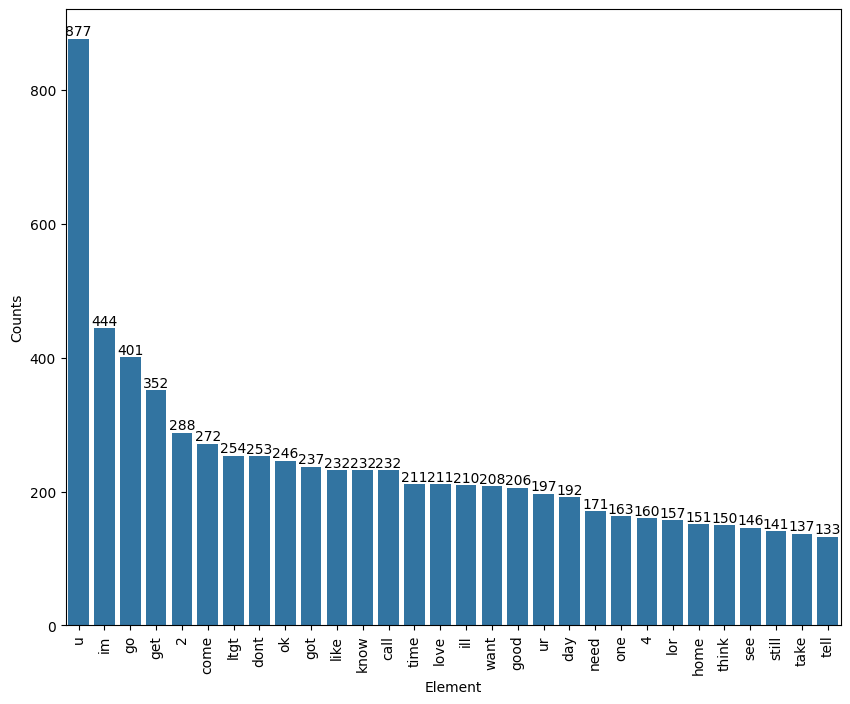

In [75]:
Count(0) 

<BarContainer object of 30 artists>

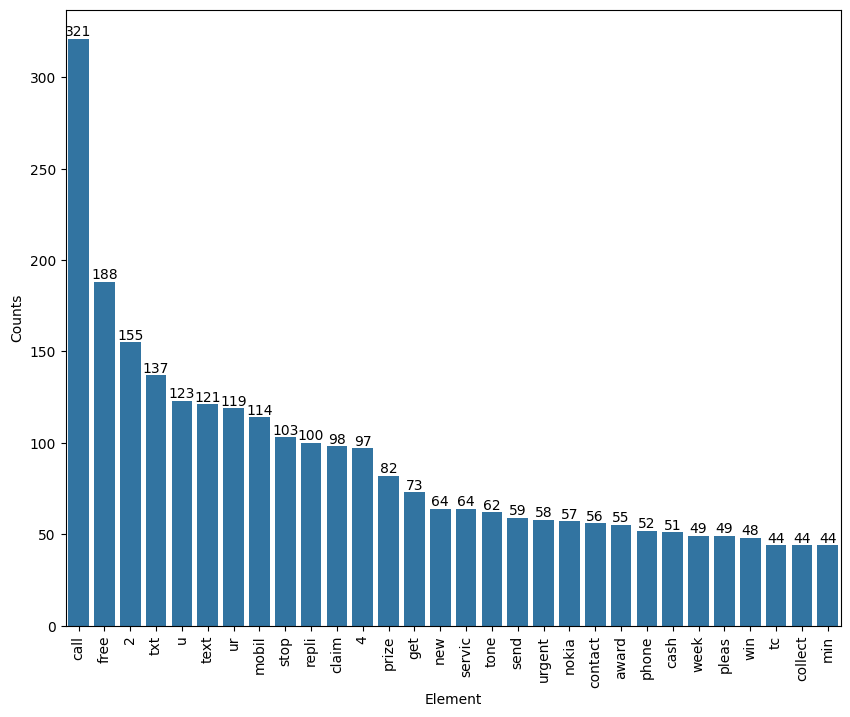

In [76]:
Count(1)

### Model Building

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv= TfidfVectorizer(max_features=3000)

In [78]:
x=cv.fit_transform(df["Transformed_Text"]).toarray()

In [79]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [80]:
y=df["Target"].values

In [81]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [82]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.2 , random_state=42)

In [83]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [84]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [85]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print("GaussianNB")
print(f"Training Score : {gnb.score(x_train,y_train)}")
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")
print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred)}")

GaussianNB
Training Score : 0.8989117291414752
Accuracy Score : 0.8636363636363636
Precision Score : 0.5084033613445378
Confusion Matrix : [[772 117]
 [ 24 121]]


In [86]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print("MultinomialNB")
print(f"Training Score : {mnb.score(x_train,y_train)}")
print(f"Accuracy Score : {accuracy_score(y_test,y_pred1)}")
print(f"Precision Score : {precision_score(y_test,y_pred1)}")
print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred1)}")

MultinomialNB
Training Score : 0.9796856106408706
Accuracy Score : 0.9748549323017408
Precision Score : 1.0
Confusion Matrix : [[889   0]
 [ 26 119]]


In [87]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print("BernoulliNB")
print(f"Training Score : {bnb.score(x_train,y_train)}")
print(f"Accuracy Score : {accuracy_score(y_test,y_pred2)}")
print(f"Precision Score : {precision_score(y_test,y_pred2)}")
print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred2)}")

BernoulliNB
Training Score : 0.9854897218863361
Accuracy Score : 0.971953578336557
Precision Score : 0.9833333333333333
Confusion Matrix : [[887   2]
 [ 27 118]]


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [90]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc,  
    'ETC': etc,
    'GBDT':gbdt
}

In [91]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy , precision


In [92]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9738878143133463, 0.9402985074626866)

In [93]:
ac=[]
pc=[]

for name , clf in clfs.items():
    
    cur_acc,cur_prec=train_classifier(clf,x_train,y_train,x_test,y_test)

    print("For : ", name)
    print("Accuracy : ", cur_acc)
    print("Precision : ", cur_prec)

    ac.append(cur_acc)
    pc.append(cur_prec)

For :  SVC
Accuracy :  0.9738878143133463
Precision :  0.9402985074626866
For :  KN
Accuracy :  0.9061895551257253
Precision :  1.0
For :  NB
Accuracy :  0.9748549323017408
Precision :  1.0
For :  DT
Accuracy :  0.9303675048355899
Precision :  0.8348623853211009
For :  LR
Accuracy :  0.9468085106382979
Precision :  0.8813559322033898
For :  RF
Accuracy :  0.9748549323017408
Precision :  0.9917355371900827
For :  AdaBoost
Accuracy :  0.9148936170212766
Precision :  0.7878787878787878
For :  ETC
Accuracy :  0.9758220502901354
Precision :  0.9838709677419355
For :  GBDT
Accuracy :  0.9448742746615088
Precision :  0.9680851063829787


In [94]:
perf_df=pd.DataFrame({"Algorithms": clfs.keys() , "Accuracy" : ac , "Precision" : pc}).sort_values("Precision" , ascending=False)

In [95]:
perf_df

,Algorithms,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.974855,1.000000
5,RF,0.974855,0.991736
7,ETC,0.975822,0.983871
8,GBDT,0.944874,0.968085
0,SVC,0.973888,0.940299
4,LR,0.946809,0.881356
3,DT,0.930368,0.834862
6,AdaBoost,0.914894,0.787879


In [96]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

NameError: name 'performance_df' is not defined

In [116]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.892650
1,NB,Accuracy,0.961315
2,RF,Accuracy,0.970986
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.974855
5,GBDT,Accuracy,0.953578
6,LR,Accuracy,0.941006
7,AdaBoost,Accuracy,0.959381
8,DT,Accuracy,0.930368
9,KN,Precision,1.000000


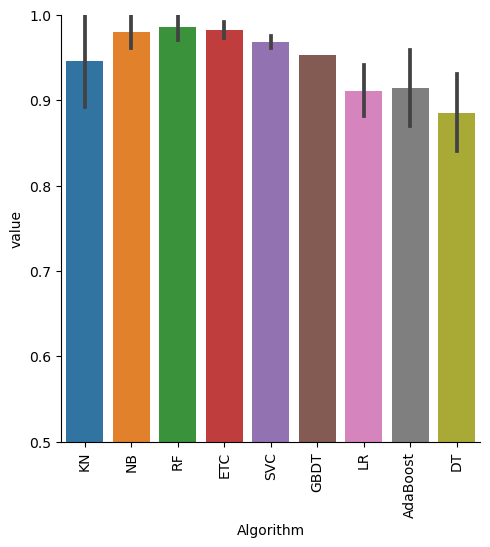

In [117]:
g=sns.catplot(x="Algorithm",y="value",data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()


In [118]:
import pickle 

pickle.dump(cv,open("Vectorizers.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))